# Midterm classification algo testing
### by Joe Tannoury

In [1]:
import pandas as pd
from MachineLearning import MLModels

# Running

In [2]:
dataset = pd.read_csv('ophiuchus_table.tsv', delimiter=';',comment='#').dropna()

machine = MLModels(
  pd_dataset= dataset,
    # drop the ones that do not have clean data
  x_columns = dataset.dtypes.drop(['Coretype', 'Name', 'DEJ2000', 'FWHMa070', 'NpH2/Nbg', 'RAJ2000', 'Sconv070', 'Seq',
       'Signi070', 'Sp070', 'Sp070/Sbg070', 'Stot070', 'e_Sp070', 'e_Stot070']).keys(),
  y_columns = ['Coretype'],
)

In [3]:
machine.summary_stats()

Summary Stats of Loaded Dataframe 
 <bound method NDFrame.describe of     FWHMb070 PA070  Signi160   Sp160  e_Sp160  Sp160/Sbg160  Sconv160  \
0         11    10       0.0  0.0399    0.020          0.05     0.203   
1         89    30       9.0  0.2410    0.032          0.13     1.820   
2          8    71      70.0  1.5700    0.061          0.66     1.810   
3         26    51       8.3  0.1470    0.056          0.06     0.270   
4        123    35       9.5  0.3210    0.051          0.14     2.960   
..       ...   ...       ...     ...      ...           ...       ...   
508        8   134      51.1  1.1100    0.020          0.89     1.500   
509      124    21       0.0  0.0649    0.035          0.05     0.677   
510      101   -24       0.0  0.0338    0.021          0.02     0.344   
511       54    -4      12.2  0.4560    0.047          0.31     3.940   
512        9   -31      56.5  1.1500    0.020          1.03     2.130   

     Stot160  e_Stot160 FWHMa160  ... FWHMb500 PA500 

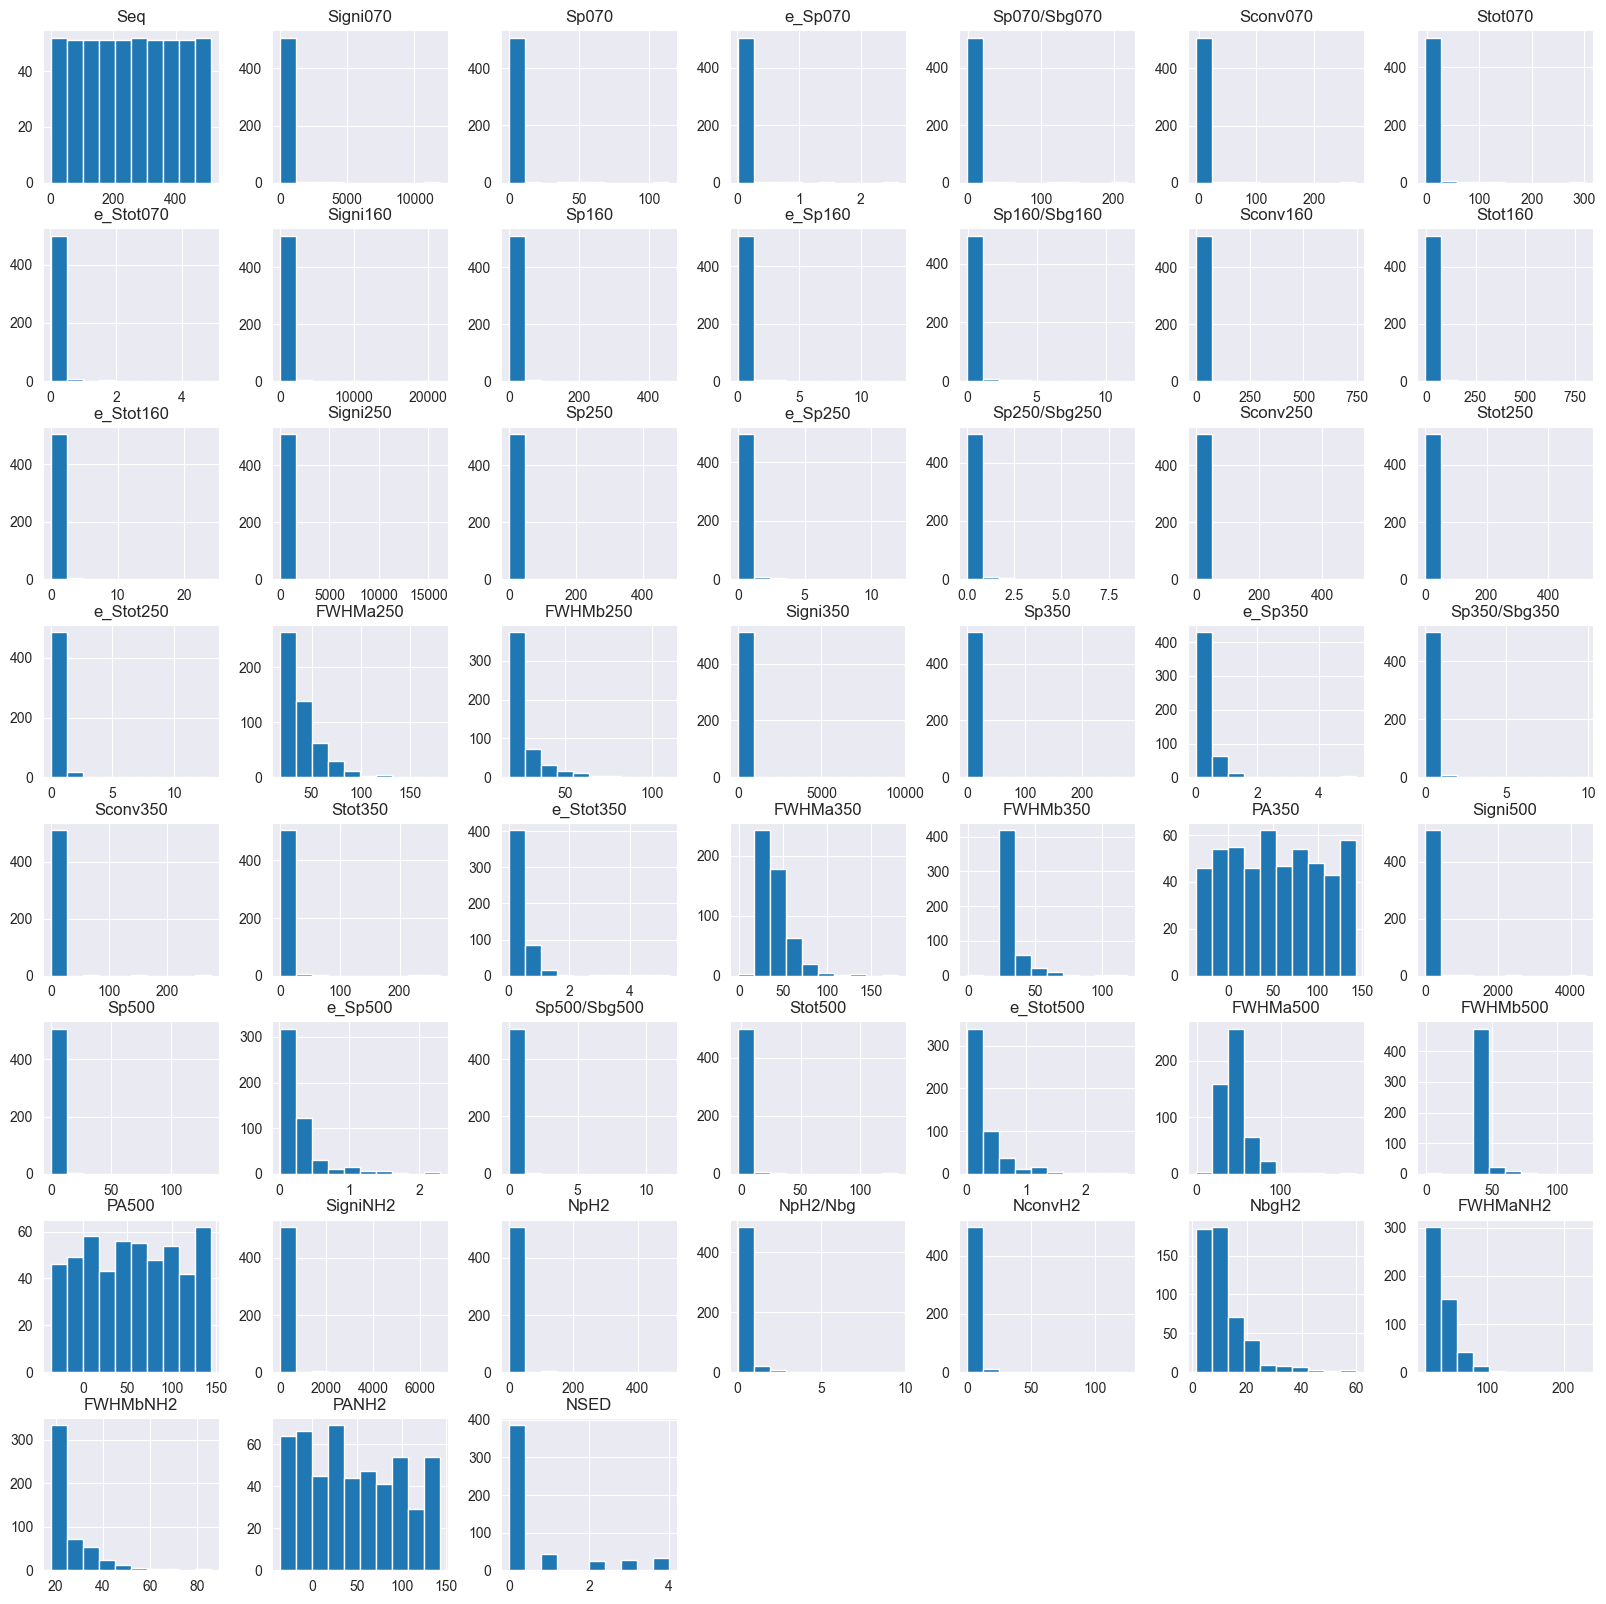

In [4]:
machine.dataset_plot()

/Users/joe/Workplace/AUP/CLASSES/2022/FALL/projects/midterm_Fall2022/MachineLearning.py:59: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pear_corr = self.dataset.corr(method='pearson')


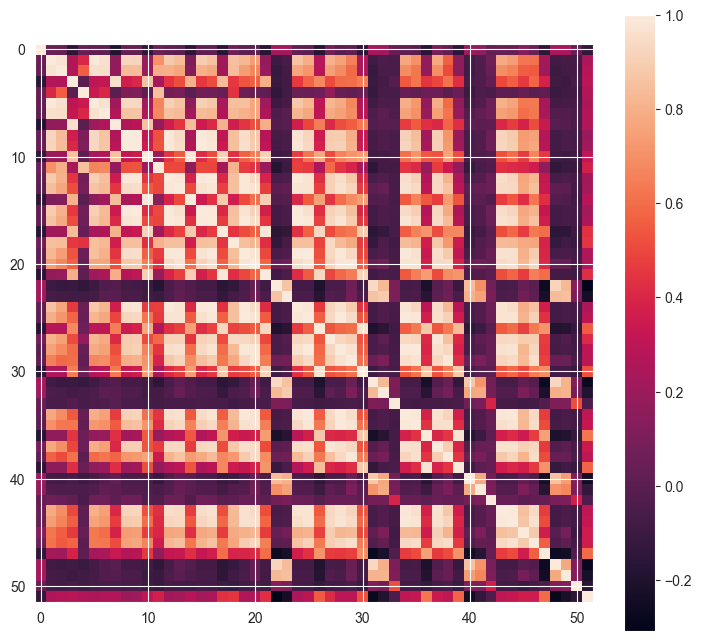

In [5]:
machine.heat_map()

In [6]:
machine.clean_data()  # necessary as osme

/Users/joe/Workplace/AUP/CLASSES/2022/FALL/projects/midterm_Fall2022/venv/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# split the data into training and testing
machine.split_test_train(0.33)

Shape of original Dataframe: (513, 55) (513,) 
    Shape of training data: (343, 55) (343,) 
    Shape of testing data: (170, 55) (170,)


In [8]:
# scale the data (possible inputs are 'standard', 'minmax', and 'robust' (all found in myMachine.scaleTypes))
machine.scale_data('robust')

Scaling test and training x data using robust

Summary of dataframe scaled with robust:
<bound method NDFrame.describe of            0         1          2          3         4           5   \
0   -0.279099 -0.326505  -0.259535  -0.162600  0.340795    0.000000   
1   -0.744265  0.704563  -0.193142  -0.120445  0.113598   -0.613173   
2    0.186066 -1.495047  -0.627713  -0.376690 -0.170397   -0.613173   
3   -0.232583 -0.601456   2.341853   2.947882  2.300365    1.471614   
4   -0.232583 -0.738931   0.609606   0.665456  2.158367   -0.490538   
..        ...       ...        ...        ...       ...         ...   
338 -0.837298  0.034369  37.680890  39.683484  0.738389  103.012980   
339 -0.372132 -0.859223  -0.211250  -0.159589  0.156198   -0.613173   
340 -0.279099  0.498349   2.897137   3.309215  2.442363    1.716883   
341 -0.093033 -1.426310   0.120714  -0.090333  0.738389   -0.490538   
342  1.767628  1.495047  -0.627713  -0.441128 -0.454393   -0.613173   

            6         7  

# Models results
fit models, predict outcomes, and display results of each model

## NearestNeighbors Model

In [9]:
machine.classify_data('NearestNeighbors')
machine.show_results()


Confusion Matrix & classification report :
[[32  0 13]
 [ 2 12  3]
 [11  1 96]]
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        45
           1       0.92      0.71      0.80        17
           2       0.86      0.89      0.87       108

    accuracy                           0.82       170
   macro avg       0.83      0.77      0.79       170
weighted avg       0.83      0.82      0.82       170



0.8235294117647058

## GaussNB Model

In [10]:
machine.classify_data('GaussNB')
machine.show_results()

Confusion Matrix & classification report :
[[26  6 13]
 [ 2 10  5]
 [11  4 93]]
              precision    recall  f1-score   support

           0       0.67      0.58      0.62        45
           1       0.50      0.59      0.54        17
           2       0.84      0.86      0.85       108

    accuracy                           0.76       170
   macro avg       0.67      0.68      0.67       170
weighted avg       0.76      0.76      0.76       170



0.7588235294117647

## Perceptron Model

In [11]:
machine.classify_data('Perceptron')
machine.show_results()

Confusion Matrix & classification report :
[[ 32   0  13]
 [  0  10   7]
 [  5   2 101]]
              precision    recall  f1-score   support

           0       0.86      0.71      0.78        45
           1       0.83      0.59      0.69        17
           2       0.83      0.94      0.88       108

    accuracy                           0.84       170
   macro avg       0.84      0.74      0.78       170
weighted avg       0.84      0.84      0.84       170



0.8411764705882353

## SVM Model


In [12]:
machine.classify_data('SVM')
machine.show_results()

Confusion Matrix & classification report :
[[41  0  4]
 [ 0 14  3]
 [ 9  3 96]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.86        45
           1       0.82      0.82      0.82        17
           2       0.93      0.89      0.91       108

    accuracy                           0.89       170
   macro avg       0.86      0.87      0.87       170
weighted avg       0.89      0.89      0.89       170



0.888235294117647